<a href="https://colab.research.google.com/github/Jayashree-V28/EXPOSING-THE-TRUTH-WITH-FAKE-NEWS-DETECTION-POWERED-WITH-NATURAL-LANGUAGE-PROCESSING/blob/main/Fake_News_Detection_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving news.csv to news.csv



First 5 rows of the dataset:
                                                text  label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10240 non-null  object
 1   label   10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
None

Label distribution:
label
True     5752
False    4488
Name: count, dtype: int64


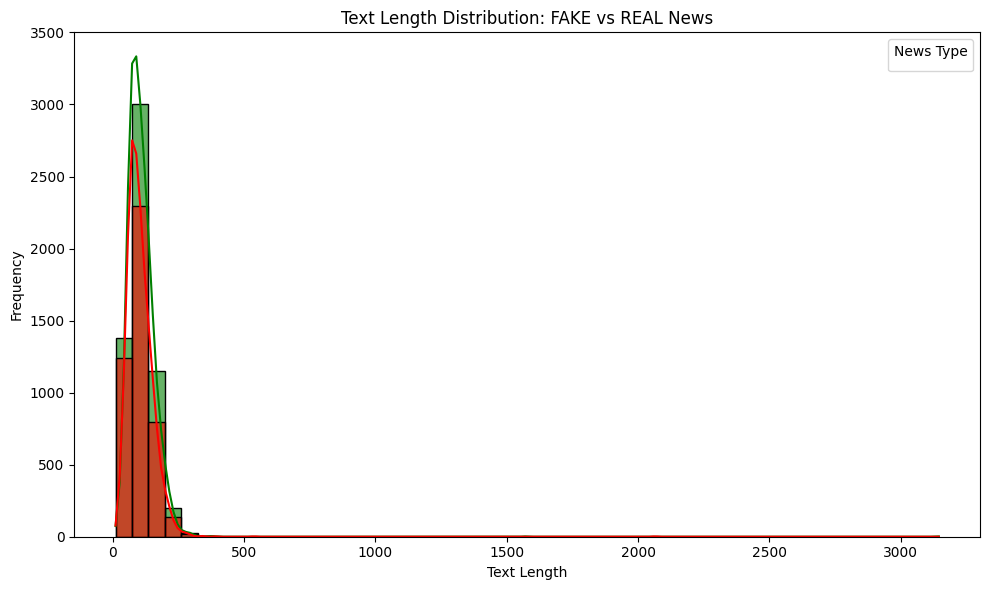

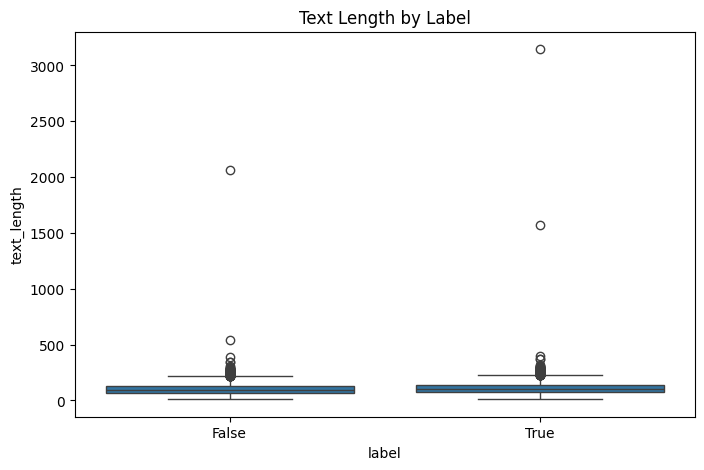

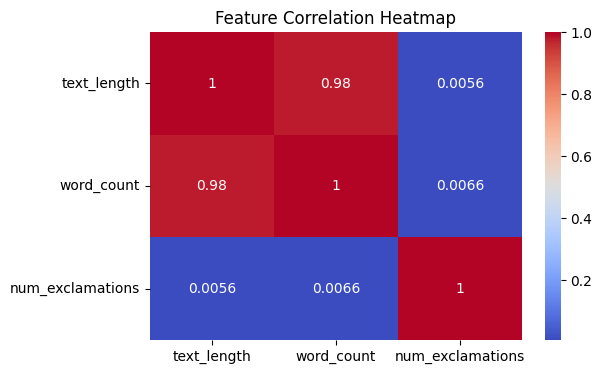


✅ Accuracy Score: 0.5386

🧩 Confusion Matrix:
[[432 456]
 [489 671]]


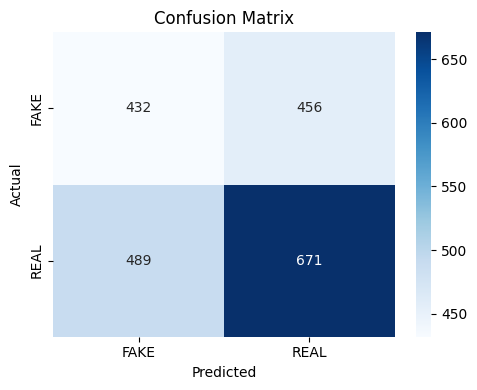


📋 Classification Report:
              precision    recall  f1-score   support

       False       0.47      0.49      0.48       888
        True       0.60      0.58      0.59      1160

    accuracy                           0.54      2048
   macro avg       0.53      0.53      0.53      2048
weighted avg       0.54      0.54      0.54      2048

🚀 ROC AUC Score: nan


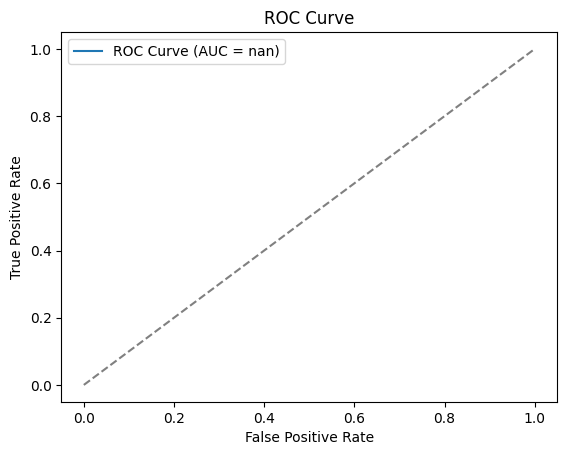


Model and vectorizer saved.

🔍 Try Fake News Detection:

Enter news article content (or type 'exit' to quit):
> Says the Annies List political group supports third-trimester abortions on demand.

🧠 Prediction: False
📊 Confidence Score: -5.20

Enter news article content (or type 'exit' to quit):
> The economic turnaround started at the end of my term.

🧠 Prediction: True
📊 Confidence Score: 1.13

Enter news article content (or type 'exit' to quit):
> exit
Exiting prediction. Thank you!


In [3]:
# fake_news_detection.py
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib

# Step 1: Load Data
df = pd.read_csv('news.csv')
if 'label' not in df.columns:
    if 'Fake' in df.columns:
        # Rename 'Fake' column to 'label'
        df = df.rename(columns={'Fake': 'label'})
if 'text' not in df.columns and 'News' in df.columns:
    df = df.rename(columns={'News': 'text'})  # Rename 'News' to 'text'
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 2: Basic Info
print("\nData Info:")
print(df.info())

print("\nLabel distribution:")
print(df['label'].value_counts())

# Step 3: Feature Engineering
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['num_exclamations'] = df['text'].apply(lambda x: x.count('!'))


# Step 4: EDA Visualizations
plt.figure(figsize=(10, 6))
# Convert boolean values to strings for the palette
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True,
             palette={True: 'green', False: 'red'}, alpha=0.6)
plt.title('Text Length Distribution: FAKE vs REAL News')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='News Type')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length by Label')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['text_length', 'word_count', 'num_exclamations']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: TF-IDF Vectorization
X = df['text']
y = df['label']
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {accuracy:.4f}")


# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
print("\n🧩 Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_score = roc_auc_score((y_test == 'REAL').astype(int), model.decision_function(X_test))
print(f"🚀 ROC AUC Score: {roc_score:.4f}")

# Step 9: ROC Curve
fpr, tpr, _ = roc_curve((y_test == 'REAL').astype(int), model.decision_function(X_test))
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 10: Save Model
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("\nModel and vectorizer saved.")

# Step 11: Sample Prediction
print("\n🔍 Try Fake News Detection:")
while True:
    sample_text = input("\nEnter news article content (or type 'exit' to quit):\n> ")
    if sample_text.lower() == 'exit':
        print("Exiting prediction. Thank you!")
        break
    sample_vector = vectorizer.transform([sample_text])
    prediction = model.predict(sample_vector)[0]
    confidence = model.decision_function(sample_vector)[0]
    print(f"\n🧠 Prediction: {prediction}")
    print(f"📊 Confidence Score: {confidence:.2f}")


